In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/content/tweets_v8.csv')
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet
0,the _ûndër-ratèd niggáh👊🏾,NaN,@ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...,Twitter for Android,False
1,Best uncle on planet earth,NaN,NaN,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me. 😭😭😭,Twitter for Android,False
2,marcie,NaN,animal crossing. chicken nuggets. baby yoda. s...,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06 12:05:22+00:00,#Squidgame time,Twitter Web App,False
3,YoMo.Mdp,Any pronouns,Where the heck is the karma\nI'm going on my s...,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...,Twitter Web App,False
4,Laura Reactions,France,I talk and I make reactions videos about shows...,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",Twitter Web App,False


In [ ]:
# To drop column which is not useful
data = data.drop(columns="user_location", axis=1)

In [ ]:
print(data.isnull().sum()) # To check null values

user_name              4
user_description    5211
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
source                 0
is_retweet             0
dtype: int64


In [ ]:
data = data.drop(columns = "user_description" , axis = 1)
data = data.dropna() # To drop NaN

In [ ]:
data.head()

,user_name,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet
0,the _ûndër-ratèd niggáh👊🏾,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...,Twitter for Android,False
1,Best uncle on planet earth,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me. 😭😭😭,Twitter for Android,False
2,marcie,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06 12:05:22+00:00,#Squidgame time,Twitter Web App,False
3,YoMo.Mdp,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...,Twitter Web App,False
4,Laura Reactions,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",Twitter Web App,False


In [ ]:
# Import necessary libraries
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

# To perform data cleaning

def clean(text):
    text = str(text).lower()  # Convert the text to lower case
    text = re.sub('\[.*?\]', '', text) # replaces these pattern with empty string
    text = re.sub('https?://\S+|www\.\S+', '', text) # replaces URLs
    text = re.sub('<.*?>+', '', text) # replaces the HTML tags
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # To remove punctuations
    text = re.sub('\n', '', text) # To remove new line
    text = re.sub('\w*\d\w*', '', text) # To replace words that contain digits
    text = [word for word in text.split(' ') if word not in stopword] # To remove stopwords (like is,the,and)
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')] # To return root word (running,runns to run)
    text=" ".join(text)
    return text

# Apply the defined function on the text column
data["text"] = data["text"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


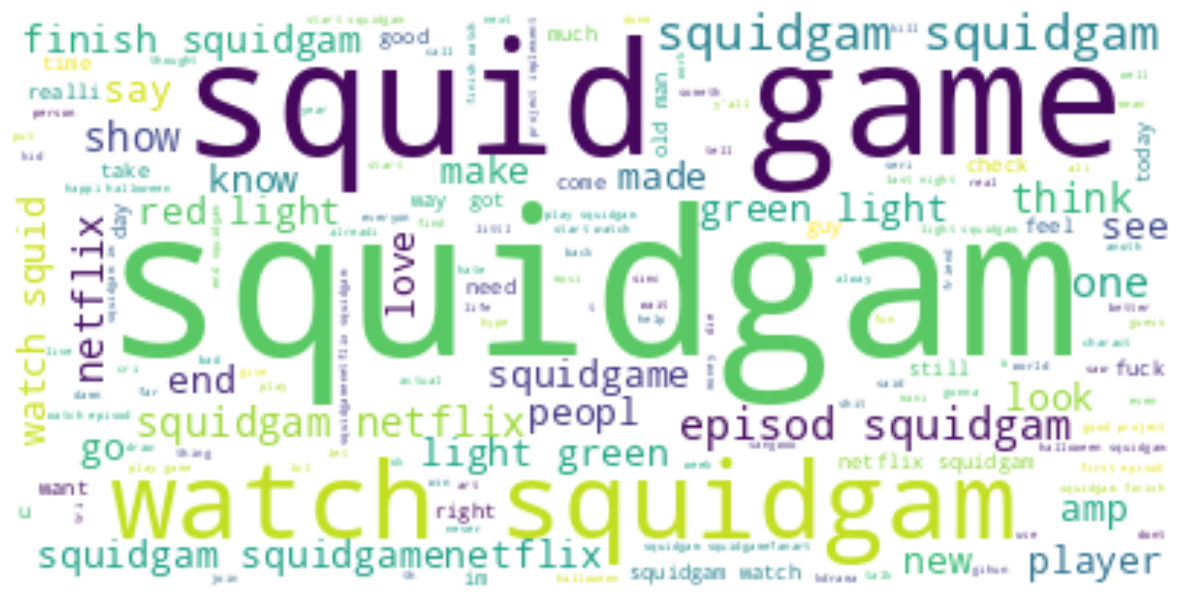

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud , STOPWORDS

text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS) # set stopwords using WordCloud's built-in data
# Generate WorldCloud object with specific parameters
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Plot the WordCloud
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Download the VADER lexicon
nltk.download('vader_lexicon')
# Create a Object
sentiments = SentimentIntensityAnalyzer()
# Calculate the sentiment score for each text in the text column
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["text"]]
# Print the relevent columns from the DataFrame
data = data[["text", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                                text  Positive  Negative  \
0  life hit time poverti strike yougong yoo  let ...     0.173     0.108   
1                    marbl episod squidgam  ruin 😭😭😭     0.000     0.487   
2                                      squidgam time     0.000     0.000   
3  blood  slideim join squidgam thing im alreadi ...     0.142     0.277   
4  two first game player kill mask guy  bloodi ni...     0.000     0.461   

   Neutral  
0    0.719  
1    0.513  
2    1.000  
3    0.581  
4    0.539  


In [ ]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")

sentiment_score(x, y, z)

Neutral 🙂 


In [ ]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  10604.55899999976
Negative:  5171.334000000031
Neutral:  64233.11800000302
